# Dataset Analysis

In [1]:
import datasets, re
import pandas as pd
from sklearn import preprocessing as sk_preprocess

In [2]:
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.describe()

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-1d47093687320b66
Reusing dataset parquet (C:\Users\Usuario\.cache\huggingface\datasets\ucberkeley-dlab___parquet\ucberkeley-dlab--measuring-hate-speech-1d47093687320b66\0.0.0\7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


  0%|          | 0/1 [00:00<?, ?it/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,...,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000,135388.000000
mean,23528.597283,5566.552523,1.281199,2.954280,2.828751,2.563152,2.278333,2.698784,1.845651,1.051666,...,0.744527,-0.567465,1.034367,1.001085,-0.018735,0.300572,1.007152,1.011709,0.014535,37.912799
std,12386.724630,3230.864231,1.023495,1.231662,1.309693,1.389984,1.370983,0.898430,1.402575,1.345656,...,0.932267,2.380312,0.496865,0.791993,0.487189,0.236407,0.269875,0.676072,0.613035,11.643449
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18147.750000,2720.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341100,29.000000
50%,20052.000000,5600.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32035.000000,8363.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [3]:
df.head()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [4]:
df.shape

(135388, 131)

In [5]:
df.columns

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

array([[<AxesSubplot:title={'center':'sentiment'}>]], dtype=object)

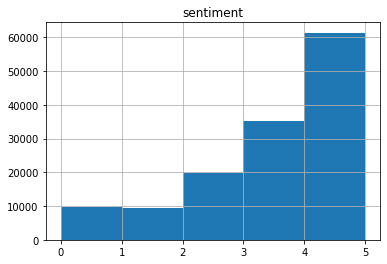

In [6]:
df.hist(column='sentiment', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'respect'}>]], dtype=object)

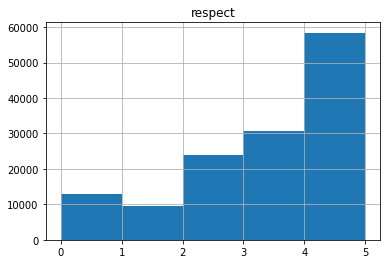

In [7]:
df.hist(column='respect', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'insult'}>]], dtype=object)

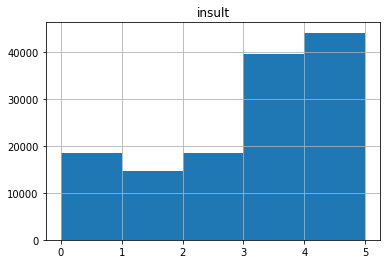

In [8]:
df.hist(column='insult', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'humiliate'}>]], dtype=object)

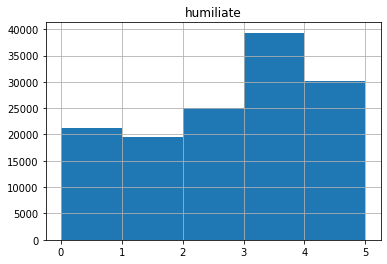

In [9]:
df.hist(column='humiliate', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'status'}>]], dtype=object)

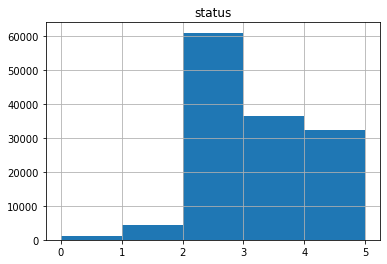

In [10]:
df.hist(column='status', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'dehumanize'}>]], dtype=object)

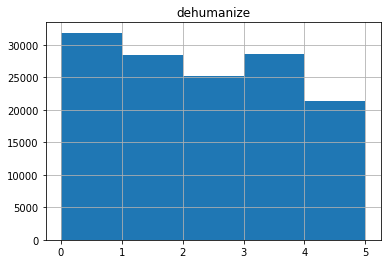

In [11]:
df.hist(column='dehumanize', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'violence'}>]], dtype=object)

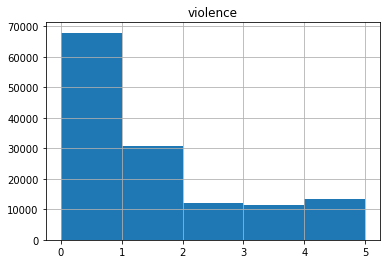

In [12]:
df.hist(column='violence', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'genocide'}>]], dtype=object)

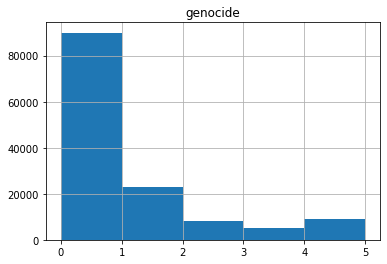

In [13]:
df.hist(column='genocide', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'attack_defend'}>]], dtype=object)

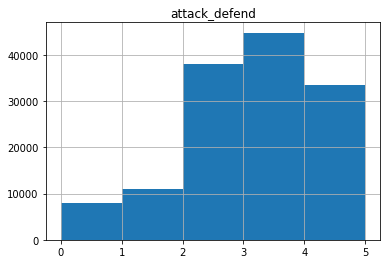

In [14]:
df.hist(column='attack_defend', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'platform'}>]], dtype=object)

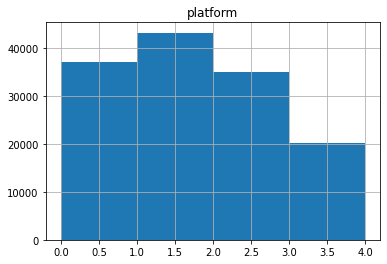

In [15]:
df.hist(column='platform', bins=[0,1,2,3,4])

array([[<AxesSubplot:title={'center':'hate_speech_score'}>]], dtype=object)

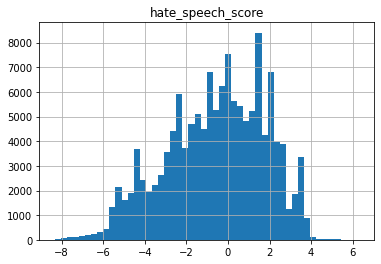

In [17]:
df.hist(column='hate_speech_score', bins=50)

In [18]:
sample = df.loc[df['hatespeech'].isin([0,1,2]), ['text','hatespeech', 'hate_speech_score']].sample(5)
for text in sample.values:
    print(text)

['This lady is the biggest piece of garbage to ever be on tv.' 0.0 0.06]
["Worse.  Saw this coming. Suddenly remove the people who organized and governed and stabilized the region and replace them suddenly with socialism and leadership based on race and not merit, and here's your result."
 0.0 -0.39]
['You look like a dude and France is a country of cheese eating surrender monkeys and violent Muslim rapists.'
 2.0 2.34]
['none of these ladies should open there mouths...liberal socialist and worse  The rag head marries her bro. Leave bitches'
 2.0 1.06]
['Looks to me like a cynical pr attempt by the zionist master race to wax humanistic with a special emphasis on the "judaism" of their efforts as they continue their controlled-collapse of the US.'
 0.0 -0.28]


In [19]:
print('hatespeech max:', df.hatespeech.max())
print('hatespeech min:', df.hatespeech.min())
print('hate_speech_score max:', df.hate_speech_score.max())
print('hate_speech_score min:', df.hate_speech_score.min())

hatespeech max: 2.0
hatespeech min: 0.0
hate_speech_score max: 6.3
hate_speech_score min: -8.34


### Normalize Data

In [20]:
def split_hashtag(token: str) -> str:
    i, end = len(token) - 2, len(token) + 1
    response = ''
    while i >= 1:
        word = token[i:end]
        if word[0].isupper():
            response = token[i:end] + ' ' + response
            end = i
        i -= 1
    else:
        if end-1 > 0:
            response = token[1:end] + ' ' + response
    return(response.strip())

In [21]:
def expand_contractions(document: str) -> str:
    """
    Replace all abbreviations with their corresponding expansion
    """
    document = re.sub(r"'cause", "because", document)
    document = re.sub(r"o'clock", "of the clock", document)
    document = re.sub(r"won\'t", "will not", document)
    document = re.sub(r"can\'t", "can not", document)
    document = re.sub(r"n\'t", " not", document)
    document = re.sub(r"\'re", " are", document)
    document = re.sub(r"\'s", " is", document)
    document = re.sub(r"\'d", " would", document)
    document = re.sub(r"\'ll", " will", document)
    document = re.sub(r"\'t", " not", document)
    document = re.sub(r"\'ve", " have", document)
    document = re.sub(r"\'m", " am", document)
    return document

In [22]:
def preprocessing(document: str) -> list:
    """
    expand contractions
    replace any @user type with 'user' token
    split hashtags into words by upper case
    text to lower case
    remove new line char
    remove non latin chars
    remove extra blank spaces
    """
    document = expand_contractions(document)
    document = re.sub('@[a-zA-Z0-9_-]{0,150}', 'user', document)
    hashtags = re.findall('#[a-zA-Z0-9_-]{0,150}', document)
    for hashtag in hashtags:
        split = split_hashtag(hashtag)
        document = re.sub(hashtag, split, document)
    document = document.lower()
    document = re.sub('\n', ' ', document)
    document = re.sub('[^a-zA-Z]|[0-9]', ' ', document)
    document = re.sub('\s+', ' ', document)
    return document

In [27]:
columns = ['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence', 'genocide', 'attack_defend', 'hatespeech', 'hate_speech_score']
data = df[columns]
min_max_scaler = sk_preprocess.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data.values)
dataset = pd.DataFrame(data_scaled, columns=columns)
dataset['text'] = df.text
dataset['processed'] = df.text.apply(preprocessing)

In [31]:
dataset.sample(10)

,sentiment,respect,insult,humiliate,status,dehumanize,violence,genocide,attack_defend,hatespeech,hate_speech_score,text,processed
94992,1.00,1.00,1.00,0.75,0.50,0.50,0.75,0.50,1.00,1.0,0.756148,"""@iamkrause: No need to thank me, killing nigg...",user no need to thank me killing niggers is i...
19926,1.00,1.00,1.00,0.50,0.75,0.75,0.00,0.00,1.00,1.0,0.637295,Did you also conclude that Jesus was a fucking...,did you also conclude that jesus was a fucking...
16907,1.00,1.00,1.00,1.00,1.00,0.75,0.00,0.00,1.00,1.0,0.711066,"Of course, you little brown whores are so eage...",of course you little brown whores are so eager...
107682,1.00,1.00,1.00,1.00,1.00,1.00,0.75,0.25,1.00,1.0,0.681011,"They all need to be Kicked, taken out of our c...",they all need to be kicked taken out of our co...
56480,0.75,0.75,1.00,0.75,0.25,0.50,0.00,0.00,0.75,0.5,0.534153,I'm obviously not glad she's feeling suicidal ...,i am obviously not glad she is feeling suicida...
128683,0.75,0.75,0.75,0.50,0.75,0.75,0.00,0.00,0.50,0.0,0.297814,"I, a Catholic and a Jesuit, am grateful for th...",i a catholic and a jesuit am grateful for this...
4277,0.50,0.50,0.50,0.50,0.50,0.25,0.00,0.00,0.50,0.0,0.446721,Sa is sensitive.. hella like a girl.. let the ...,sa is sensitive hella like a girl let the man ...
39447,1.00,1.00,1.00,1.00,0.75,0.00,0.00,0.00,1.00,1.0,0.614754,Either she lyin or it was a dyke that did it 🥴...,either she lyin or it was a dyke that did it url
82274,0.75,0.75,0.75,0.25,0.75,0.25,0.25,0.25,0.50,0.0,0.489071,"@Sanele_NZ Smh, the male species never know ho...",user smh the male species never know how to ac...
70006,0.75,0.50,0.50,0.50,0.50,0.75,0.75,0.75,0.75,0.0,0.547131,Wipe out everybody and racism will be no more,wipe out everybody and racism will be no more


In [40]:
dataset.sample(10)[['text', 'processed']]

,text,processed
47941,Yeah you guys all confirmed what I thought. A ...,yeah you guys all confirmed what i thought a c...
103629,"At 7:19 is why I hate people, women especially...",at is why i hate people women especially look ...
64164,This guy in my friend group in high school. Th...,this guy in my friend group in high school the...
69344,HAIL SATAN! May Christians be killed slowly an...,hail satan may christians be killed slowly and...
84908,Monster cock tgirl in a hot threesome 😍♥️💦 URL,monster cock tgirl in a hot threesome url
39401,@MayorofLondon London is open......to stabbing...,user london is open to stabbings acid attacks ...
96736,gay people should die,gay people should die
73831,"1. You should never kill anyone, period especi...",you should never kill anyone period especiall...
108880,@Cam_Coles You don't know what I know. Name so...,user you do not know what i know name somebody...
26656,A couple of white wives having a fun time with...,a couple of white wives having a fun time with...


array([[<AxesSubplot:title={'center':'hate_speech_score'}>]], dtype=object)

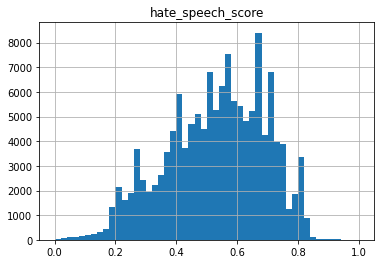

In [29]:
dataset.hist(column='hate_speech_score', bins=50)

array([[<AxesSubplot:title={'center':'sentiment'}>]], dtype=object)

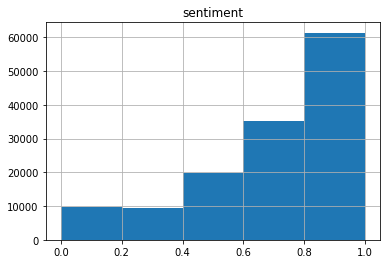

In [30]:
dataset.hist(column='sentiment', bins=5)

In [57]:
from sklearn.model_selection import train_test_split

y_sample = dataset['hate_speech_score']
X_sample = dataset[columns]
X_sample = X_sample.drop(['hate_speech_score'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [58]:
x_test

,sentiment,respect,insult,humiliate,status,dehumanize,violence,genocide,attack_defend,hatespeech
118476,1.00,1.00,1.00,1.00,0.75,0.50,0.00,0.00,1.00,1.0
36627,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.25,0.0
15866,1.00,1.00,0.75,1.00,0.50,0.75,0.25,0.00,0.75,1.0
58223,0.75,0.75,0.50,0.50,0.50,0.25,0.25,0.25,0.50,0.0
37296,1.00,1.00,0.75,0.50,0.75,0.50,0.25,0.25,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...
131707,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.0
74924,0.50,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.50,0.0
38264,0.25,0.50,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.0
33066,1.00,1.00,0.75,0.75,1.00,0.00,0.00,0.00,0.75,1.0
